<a href="https://colab.research.google.com/github/ahmedhassan97/regression-using-one-variable/blob/master/project1_linear_regression_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
path = 'data.csv'
data = pd.read_csv(path, header=None, names=['Population',
'Profit'])

data = 
    Population   Profit
0      6.1101  17.5920
1      5.5277   9.1302
2      8.5186  13.6620
3      7.0032  11.8540
4      5.8598   6.8233
5      8.3829  11.8860
6      7.4764   4.3483
7      8.5781  12.0000
8      6.4862   6.5987
9      5.0546   3.8166
**************************************
data.describe = 
        Population     Profit
count   97.000000  97.000000
mean     8.159800   5.839135
std      3.869884   5.510262
min      5.026900  -2.680700
25%      5.707700   1.986900
50%      6.589400   4.562300
75%      8.578100   7.046700
max     22.203000  24.147000
**************************************


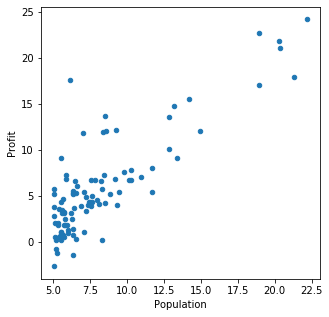

In [27]:
#show data details
print('data = \n' ,data.head(10) )
print('**************************************')
print('data.describe = \n',data.describe())
print('**************************************')
#draw data
data.plot(kind='scatter', x='Population', y='Profit', figsize=(5,5))

In [28]:
# adding a new column called ones before the data
data.insert(0, 'Ones', 1)
print('new data = \n' ,data.head(10) )
print('**************************************')




new data = 
    Ones  Population   Profit
0     1      6.1101  17.5920
1     1      5.5277   9.1302
2     1      8.5186  13.6620
3     1      7.0032  11.8540
4     1      5.8598   6.8233
5     1      8.3829  11.8860
6     1      7.4764   4.3483
7     1      8.5781  12.0000
8     1      6.4862   6.5987
9     1      5.0546   3.8166
**************************************


In [85]:
# separate X (training data) from y (target variable)
#print number of column (97*3)
cols = data.shape[1]  
print(cols)
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

#print('new data = \n' ,X.head(10) )
#print('new data = \n' ,y.head(10) )

####################################################################################

# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))
#print('X \n',X)
#print('X.shape = ' , X.shape)
#print('theta \n',theta)
#print('theta.shape = ' , theta.shape)
#print('y \n',y)
#print('y.shape = ' , y.shape)
#print('**************************************')

##################################################################################################
# cost function
def computeCost(X, y, theta):

  z = np.power(((X * theta.T) - y), 2)
  #print('z \n',z)
  #print(z.shape)
  #print('m ' ,len(X))
  return np.sum(z) / (2 * len(X))
 
print('computeCost(X, y, theta) = ' , computeCost(X, y, theta))
#print('**************************************')

###################################################################################################

# GD function
def gradientDescent(X, y, theta, alpha, iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = int(theta.ravel().shape[1])
  #print("temp is ",temp)
  #print("parameters is ",parameters)
  cost = np.zeros(iters)

  for i in range(iters):
    error = (X * theta.T) - y
    for j in range(parameters):
      term = np.multiply(error, X[:,j])
      temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
      theta = temp
      cost[i] = computeCost(X, y, theta)
  return theta, cost
  


  ##################################################################################################

# initialize variables for learning rate and iterations
alpha = 0.01
iters = 100000
# perform gradient descent to "fit" the model parameters

g, cost = gradientDescent(X, y, theta, alpha, iters)
print('g = ' , g)
print('cost = ' , cost[0:50] )
print('computeCost = ' , computeCost(X, y, g))
print('**************************************')

3
computeCost(X, y, theta) =  32.072733877455676
g =  [[-3.89578088  1.19303364]]
cost =  [6.73719046 5.93159357 5.90115471 5.89522859 5.89009494 5.88500416
 5.87993248 5.87487909 5.86984391 5.86482687 5.85982789 5.85484692
 5.84988389 5.84493874 5.8400114  5.83510181 5.8302099  5.82533562
 5.82047889 5.81563965 5.81081784 5.8060134  5.80122627 5.79645638
 5.79170367 5.78696808 5.78224955 5.77754801 5.77286341 5.76819568
 5.76354477 5.75891061 5.75429313 5.7496923  5.74510803 5.74054027
 5.73598897 5.73145406 5.72693549 5.72243319 5.71794711 5.71347718
 5.70902336 5.70458558 5.70016379 5.69575792 5.69136792 5.68699373
 5.6826353  5.67829257]
computeCost =  4.476971375975179
**************************************
